In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [62]:
items =pd.read_csv('olist_order_items_dataset.csv')
items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [63]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [64]:
payments = pd.read_csv('olist_order_payments_dataset.csv')
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [65]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews.shape

(99224, 7)

In [66]:
products = pd.read_csv('olist_products_dataset.csv')
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [85]:
products.shape

(32951, 9)

In [86]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [67]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [68]:
trans = pd.read_csv('product_category_name_translation.csv')
trans.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [69]:
df = orders.merge(customers, on = 'customer_id').merge(items, on = 'order_id')\
                                                .merge(payments, on = 'order_id')\
                                                .merge(reviews, on = 'order_id')\
                                                .merge(products, on = 'product_id')\
                                                .merge(trans, on = 'product_category_name')\
                                                .merge(sellers, on = 'seller_id')


In [70]:
df = df.drop('product_category_name', axis =1)
df.rename(columns = {"product_category_name_english	": "product_category_name"}, inplace = True)


In [73]:
df.shape

(115609, 39)

In [74]:
len(df['order_id'])-len(df['order_id'].drop_duplicates())

19093

In [75]:
# vì có các đơn hàng trùng nhau do phép nối bảng nên mình sẽ xóa nó đi cụ thể là order id

In [77]:
df.shape

(96516, 39)

In [78]:
# df.drop(['review_comment_title', 'review_comment_message'], axis =1, inplace=True)

In [79]:
df['review_comment_title']=df['review_comment_title'].replace(np.nan, 'no title')
df['review_comment_message']=df['review_comment_message'].replace(np.nan, 'no comment')

# df['review_comment_title']=df['review_comment_title'].str.lower()
# df['review_comment_message']=df['review_comment_message'].str.lower()

In [80]:
#df[['order_id','review_comment_title', 'review_comment_message']]

In [81]:
# df['review_comment_title']

In [82]:
df.dropna(axis = 0, inplace = True)

In [89]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,10/23/2017 23:26,10/25/2017 2:14,10/27/2017 16:48,11/7/2017 18:04,11/13/2017 0:00,e781fdcc107d13d865fc7698711cc572,88032,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
6,5f49f31e537f8f1a496454b48edbe34d,a7260a6ccba78544ccfaf43f920b7240,delivered,8/24/2017 11:31,8/24/2017 11:45,8/25/2017 14:17,8/28/2017 20:12,9/14/2017 0:00,7a1de9bde89aedca8c5fbad489c5571c,1315,...,189.0,3.0,775.0,16.0,16.0,13.0,housewares,9350,maua,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115603,8dcb7601ceb0b144a5fdd0055b91ba28,6b9eb9660bed562d1c735d3fba0cfd60,delivered,6/19/2017 17:11,6/19/2017 17:25,7/19/2017 16:13,8/3/2017 21:03,7/20/2017 0:00,c8e0e761f5510eb859d5e7aa5f643111,14091,...,688.0,2.0,1250.0,60.0,8.0,50.0,music,89820,xanxere,SC
115604,edcf1e1eeb52381be9388c90152be52d,ce2172509c4149d65212484eb761bc37,delivered,8/21/2018 11:29,8/21/2018 11:50,8/21/2018 15:37,8/24/2018 13:06,9/6/2018 0:00,c5da6424f1f5decedef8672a1a0103e1,88350,...,1002.0,3.0,1900.0,19.0,16.0,16.0,arts_and_craftmanship,95910,lajeado,RS
115605,2c12150c742ae2fa48bc703964c16c5f,ab0cf72dfe0538a63a57d6905ccb7b57,delivered,7/28/2018 17:55,7/29/2018 18:30,7/30/2018 14:54,8/3/2018 17:46,8/16/2018 0:00,8c3c961a52bb5a0ffbce1d4e6d25cd67,35930,...,923.0,5.0,1000.0,25.0,25.0,25.0,arts_and_craftmanship,17201,jau,SP
115606,9f7ba492c273ffac8f90a623b8eadd3b,c61336d6c835632048f973d2f2db598d,delivered,8/23/2018 12:31,8/24/2018 3:24,8/24/2018 15:14,8/28/2018 2:06,9/3/2018 0:00,428f4721a509be8c52de6ec2900ba918,12305,...,654.0,3.0,200.0,16.0,6.0,16.0,arts_and_craftmanship,17201,jau,SP


In [87]:
# df.to_excel(r'D:\OneDrive - mrsnguyen\Kì 5_DUE\T633_Capstone\Data\OlistStore.xlsx', index=False)
df.to_csv(r'D:\OneDrive - mrsnguyen\Kì 5_DUE\T633_Capstone\Data\OlistStore.csv', index=False)


In [84]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_name_lenght 

In [22]:
for feature in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date',
                'review_creation_date', 'review_answer_timestamp']:
    df[feature] = pd.to_datetime(df[feature], errors = 'raise', utc = False)

In [23]:
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_name_lenght              0
product_description_lenght       0
product_photos_qty  

In [24]:
#df.to_csv('olist.csv',index=False)

In [25]:
deliveryTime = (df["order_delivered_customer_date"]-df["order_purchase_timestamp"])
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())
df['deliveryTime_Days'] = round(deliveryTime_Seconds/(24*3600), 2)

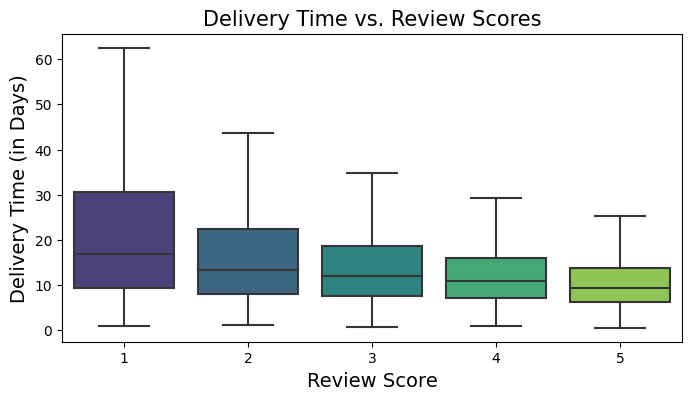

In [26]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = "review_score", y = "deliveryTime_Days", data = df, showfliers = False, palette = 'viridis')
plt.xlabel("Review Score", fontsize = 14)
plt.ylabel("Delivery Time (in Days)", fontsize = 14)
plt.title("Delivery Time vs. Review Scores", fontsize = 15)
plt.show()

# RFM

In [27]:
df_recency = df.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()
df_recency.rename(columns = {"order_purchase_timestamp": "LastPurchaseDate"}, inplace = True)
df_recency["LastPurchaseDate"] = df_recency["LastPurchaseDate"].dt.date

In [28]:
df_recency

,customer_unique_id,LastPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07
2,0000f46a3911fa3c0805444483337064,2017-03-10
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14
...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02


In [29]:
recent_date= df['order_purchase_timestamp'].dt.date.max()
df_recency['Recency']= df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [30]:
df_recency.sort_values(by=['Recency']) #2019-08-29 is the nearly date

,customer_unique_id,LastPurchaseDate,Recency
43695,7a22d14aa3c3599238509ddca4b93b01,2018-08-29,0
45801,7febafa06d9d8f232a900a2937f04338,2018-08-29,0
13168,24ac2b4327e25baf39f2119e4228976a,2018-08-29,0
12189,21dbe8eabd00b34492a939c540e2b1a7,2018-08-29,0
64728,b4dcade04bc548b7e3b0243c801f8c26,2018-08-29,0
...,...,...,...
50376,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03,695
41387,7390ed59fa1febbfda31a80b4318c8cb,2016-10-03,695
6108,10e89fd8e5c745f81bec101207ba4d7d,2016-10-03,695
48430,87776adb449c551e74c13fc34f036105,2016-10-03,695


In [31]:
df_frequency = df.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()
df_frequency.rename(columns = {"order_id": "Frequency"}, inplace = True)

In [32]:
df_frequency.sort_values(by=['Frequency'], ascending=False)

,customer_unique_id,Frequency
50406,8d50f5eadf50201ccdcedfb9e2ac8455,14
22328,3e43e6105506432c953e165fb2acf44c,9
72435,ca77025e7201e3b30c44b472ff346268,7
9869,1b6c7548a2a1f9037c1fd3ddfed95f33,7
35979,6469f99c1f9dfae7733b25662e7f1782,7
...,...,...
30916,564bc02acd888f7617b0d7c737d35aee,1
30915,564b79621999c67280ca3374ab6e5f93,1
30914,564b4b783f120f23b3a67f4004524b45,1
30913,564ab8ca31faaf89e0ce856cfd7472a6,1


In [33]:
df_frequency.groupby('Frequency').nunique()

,customer_unique_id
Frequency,
1,88759
2,2491
3,169
4,29
5,9
6,3
7,3
9,1
14,1


In [34]:
df_monetary = df.groupby('customer_unique_id', as_index = False)['payment_value'].sum()
df_monetary.rename(columns = {"payment_value": "Monetary"}, inplace = True)

In [35]:
df_monetary.sort_values(by=['Monetary'], ascending=False)

,customer_unique_id,Monetary
3656,0a0a92112bd4c708ca5fde585afaa872,13664.08
78033,da122df9eeddfedc1dc1f5349a1a690c,7571.63
42295,763c8b1c9c68a0229c42c9fc6f662b93,7274.88
78840,dc4802a71eae9be1dd28f5d788ceb526,6929.31
91198,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66
...,...,...
53761,967d07493b6792043f97262a0a4b15f8,0.01
6486,11f78d8517618f460d3a1179f42b6f9f,0.01
18152,329932a796b9bc326d71e3b932182cdf,0.01
71623,c82a940bf171daec9b52b594db8d9a62,0.01


In [36]:
rfm = df_recency.merge(df_frequency, on = 'customer_unique_id').merge(df_monetary, on = 'customer_unique_id')

In [37]:
rfm.drop('LastPurchaseDate', axis=1, inplace=True)

In [38]:
rfm2=rfm

In [39]:
# lọc outlier

In [41]:
# rfm = rfm.drop(rfm.sort_values(by=['Recency'], ascending = False).index[[0,1,2]])

In [42]:
# out_recent = rfm.sort_values(by=['Recency'], ascending=False).head(3)


In [43]:
rfm

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89
...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69


In [44]:
# out_recent

In [45]:
# rfm = rfm.drop(rfm.sort_values(by=['Frequency'], ascending=False).index[[0,1,2,3]])

In [46]:
# out_fre = rfm.sort_values(by='Frequency', ascending = False).head(4)

In [47]:
# out_fre

In [48]:
# df_monetary

In [49]:
# df_monetary.sort_values(by='Monetary',ascending=False)

In [50]:
# rfm = rfm.drop(rfm.sort_values(by=['Monetary'], ascending=False).index[0])

In [51]:
# out_money = rfm.sort_values(by=['Monetary'], ascending=False).head(1)

In [52]:
# out_money

In [53]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# rfm[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# rfm.head(3)

In [54]:
rfm = rfm.sort_values('Recency', ascending = False)
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary
66102,b8b8726af116a5cfb35b0315ecef9172,695,1,35.61
6108,10e89fd8e5c745f81bec101207ba4d7d,695,1,92.27
17011,2f64e403852e6893ae37485d5fcacdaf,695,1,39.09
50376,8d3a54507421dbd2ce0a1d58046826e0,695,1,133.46
48430,87776adb449c551e74c13fc34f036105,695,1,40.95


In [55]:
rfm = rfm.sort_values('Frequency', ascending = False)
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary
50406,8d50f5eadf50201ccdcedfb9e2ac8455,9,14,797.38
22328,3e43e6105506432c953e165fb2acf44c,183,9,1172.66
72435,ca77025e7201e3b30c44b472ff346268,89,7,1122.72
35979,6469f99c1f9dfae7733b25662e7f1782,62,7,758.83
9869,1b6c7548a2a1f9037c1fd3ddfed95f33,196,7,925.62


In [56]:
rfm = rfm.sort_values('Monetary', ascending = False)
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary
3656,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08
78033,da122df9eeddfedc1dc1f5349a1a690c,515,2,7571.63
42295,763c8b1c9c68a0229c42c9fc6f662b93,45,1,7274.88
78840,dc4802a71eae9be1dd28f5d788ceb526,563,1,6929.31
91198,ff4159b92c40ebe40454e3e6a7c35ed6,462,1,6726.66


In [57]:
rfm

,customer_unique_id,Recency,Frequency,Monetary
3656,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08
78033,da122df9eeddfedc1dc1f5349a1a690c,515,2,7571.63
42295,763c8b1c9c68a0229c42c9fc6f662b93,45,1,7274.88
78840,dc4802a71eae9be1dd28f5d788ceb526,563,1,6929.31
91198,ff4159b92c40ebe40454e3e6a7c35ed6,462,1,6726.66
...,...,...,...,...
82491,e6915acf7e23a8c5a80bead3b5aea8c9,456,1,0.01
18152,329932a796b9bc326d71e3b932182cdf,311,1,0.01
71623,c82a940bf171daec9b52b594db8d9a62,132,1,0.01
53761,967d07493b6792043f97262a0a4b15f8,30,1,0.01


C:\Users\nguye\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nguye\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

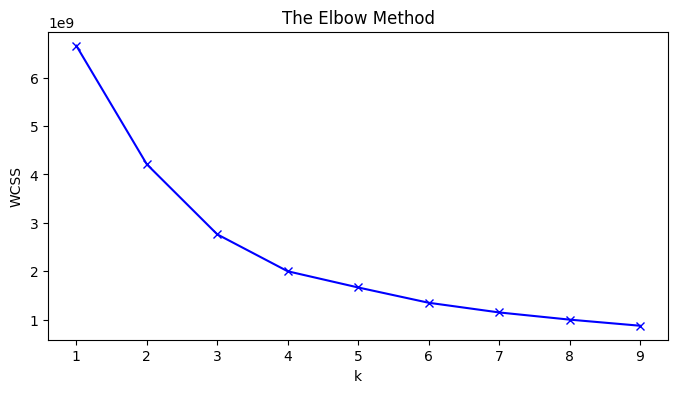

In [80]:
from sklearn.cluster import KMeans
from sklearn import datasets

wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(rfm[['Recency', 'Frequency', 'Monetary']])
    wcss.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.show()

In [59]:
rfm_model = rfm[['Recency', 'Frequency', 'Monetary']].values
clust = 4
model = KMeans(n_clusters = clust, random_state = 0).fit(rfm_model)
pred_label = model.predict(rfm_model)
rfm['Cluster_Id'] = pred_label
rfm2['Cluster_Id'] = pred_label


C:\Users\nguye\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


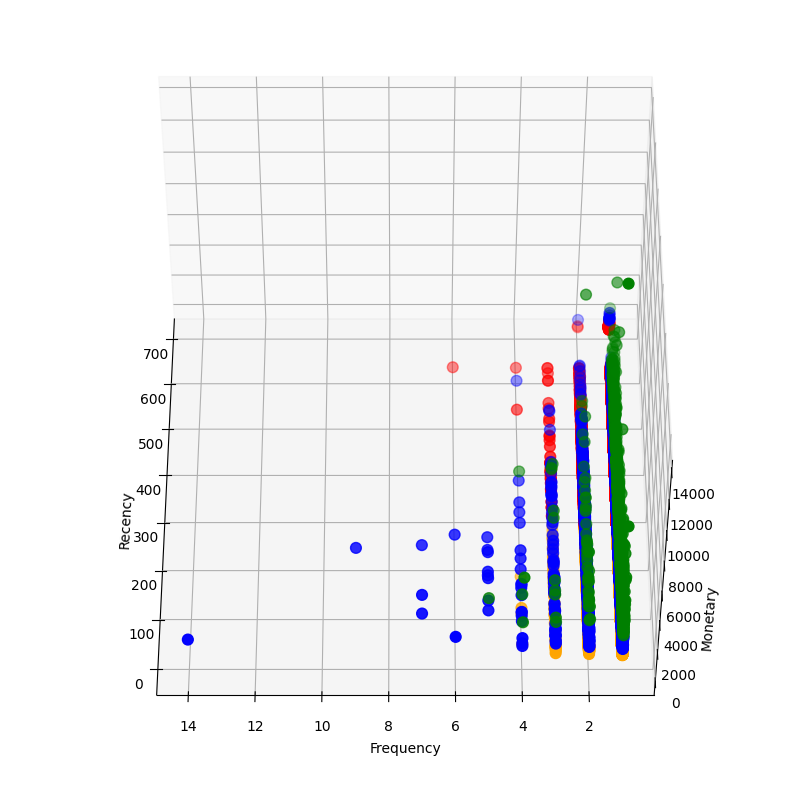

In [60]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
colorList = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
for i in range(clust) : 
  ax.scatter(rfm_model[pred_label == i, 0], rfm_model[pred_label == i, 1], rfm_model[pred_label == i, 2], c = colorList[i], s = 60)
ax.view_init(50, 180)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [61]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster_Id
3656,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08,2
78033,da122df9eeddfedc1dc1f5349a1a690c,515,2,7571.63,2
42295,763c8b1c9c68a0229c42c9fc6f662b93,45,1,7274.88,2
78840,dc4802a71eae9be1dd28f5d788ceb526,563,1,6929.31,2
91198,ff4159b92c40ebe40454e3e6a7c35ed6,462,1,6726.66,2
...,...,...,...,...,...
82491,e6915acf7e23a8c5a80bead3b5aea8c9,456,1,0.01,3
18152,329932a796b9bc326d71e3b932182cdf,311,1,0.01,3
71623,c82a940bf171daec9b52b594db8d9a62,132,1,0.01,1
53761,967d07493b6792043f97262a0a4b15f8,30,1,0.01,1


C:\Users\nguye\AppData\Local\Temp\ipykernel_13424\1929118678.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


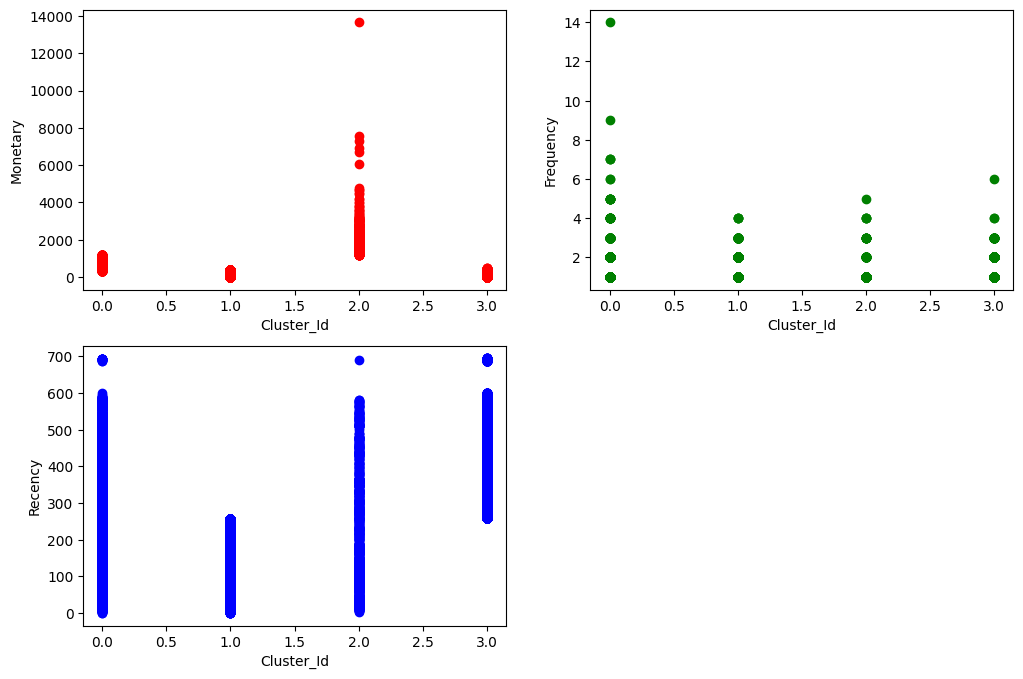

In [62]:
plt.rcParams["figure.figsize"] = (12,8) 
plt.xlim([0,3])

plt.subplot(2,2,1)
plt.scatter(rfm['Cluster_Id'], rfm['Monetary'],c='r')
plt.xlabel('Cluster_Id')
plt.ylabel('Monetary')

plt.subplot(2,2,2)
plt.scatter(rfm['Cluster_Id'], rfm['Frequency'],c='g')
plt.xlabel('Cluster_Id')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.scatter(rfm['Cluster_Id'], rfm['Recency'],c='b')
plt.xlabel('Cluster_Id')
plt.ylabel('Recency')
plt.show()

In [63]:
# plt.rcParams["figure.figsize"] = (10,6) 
# plt.xlim([0,3])

# plt.subplot(2,2,1)
# plt.scatter(rfm['Cluster_Id'], df_monetary['Monetary'],c='r')
# plt.xlabel('Cluster_Id')
# plt.ylabel('Monetary')

# plt.subplot(2,2,2)
# plt.scatter(rfm['Cluster_Id'], df_frequency['Frequency'],c='g')
# plt.xlabel('Cluster_Id')
# plt.ylabel('Frequency')

# plt.subplot(2,2,3)
# plt.scatter(rfm['Cluster_Id'], df_recency['Recency'],c='b')
# plt.xlabel('Cluster_Id')
# plt.ylabel('Recency')
# plt.show()

In [64]:
ksegment_lst = rfm['Cluster_Id']
ksegment_cluster = []

for i in ksegment_lst:
    if i == 0:
        cluster = 'regular'
        ksegment_cluster.append(cluster)
    elif i == 1:
        cluster = 'occasion'
        ksegment_cluster.append(cluster)
    elif i == 2:
        cluster = 'valuable'
        ksegment_cluster.append(cluster)
    else:
        cluster = 'passive'
        ksegment_cluster.append(cluster)
        

In [65]:
rfm['customer_segment'] = ksegment_cluster
rfm2['customer_segment'] = ksegment_cluster

In [66]:
rfm

,customer_unique_id,Recency,Frequency,Monetary,Cluster_Id,customer_segment
3656,0a0a92112bd4c708ca5fde585afaa872,334,1,13664.08,2,valuable
78033,da122df9eeddfedc1dc1f5349a1a690c,515,2,7571.63,2,valuable
42295,763c8b1c9c68a0229c42c9fc6f662b93,45,1,7274.88,2,valuable
78840,dc4802a71eae9be1dd28f5d788ceb526,563,1,6929.31,2,valuable
91198,ff4159b92c40ebe40454e3e6a7c35ed6,462,1,6726.66,2,valuable
...,...,...,...,...,...,...
82491,e6915acf7e23a8c5a80bead3b5aea8c9,456,1,0.01,3,passive
18152,329932a796b9bc326d71e3b932182cdf,311,1,0.01,3,passive
71623,c82a940bf171daec9b52b594db8d9a62,132,1,0.01,1,occasion
53761,967d07493b6792043f97262a0a4b15f8,30,1,0.01,1,occasion


In [67]:
rfm['customer_segment'].value_counts()

occasion    48612
passive     35784
regular      6317
valuable      752
Name: customer_segment, dtype: int64

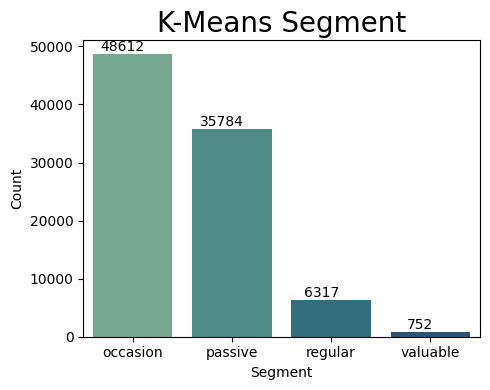

In [68]:
plt.figure(figsize=(5, 4))
df_kmeans_cat = rfm['customer_segment'].value_counts()
pal = sns.color_palette('crest', len(df_kmeans_cat))
graph =sns.barplot(x=df_kmeans_cat.index, y=df_kmeans_cat.values, palette=pal) 
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')     
plt.title('K-Means Segment', size=20)
plt.ylabel('Count')
plt.xlabel('Segment')
plt.tight_layout()
plt.show()


In [69]:
import seaborn as sns

# trực quan Recency

<AxesSubplot: xlabel='Cluster_Id', ylabel='Recency'>

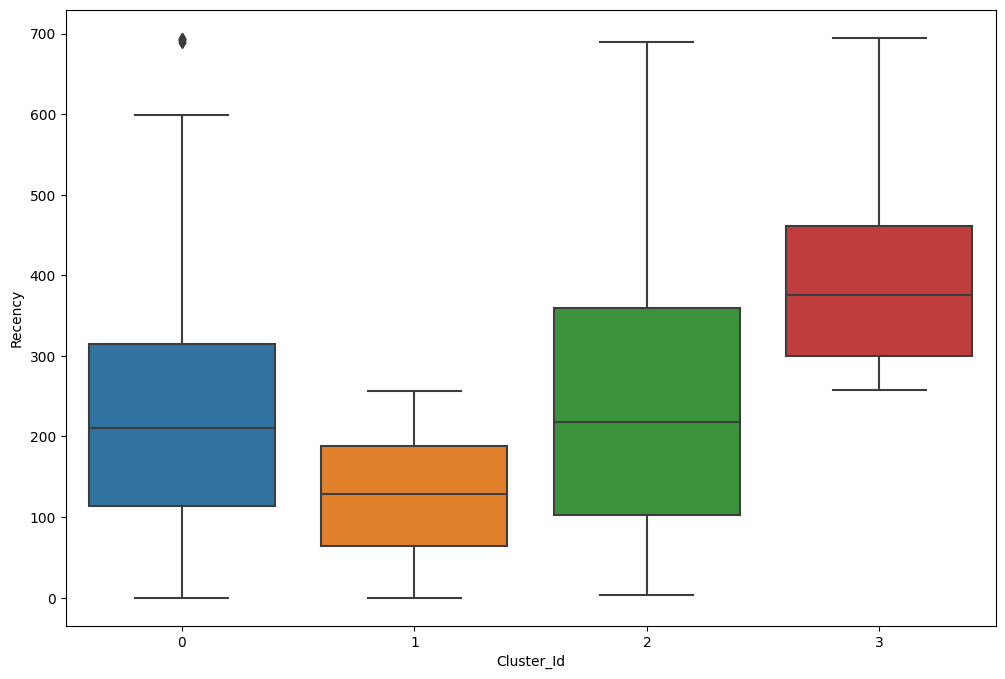

In [70]:
sns.boxplot(x = 'Cluster_Id', y = 'Recency', data = rfm)

<AxesSubplot: xlabel='Cluster_Id', ylabel='Frequency'>

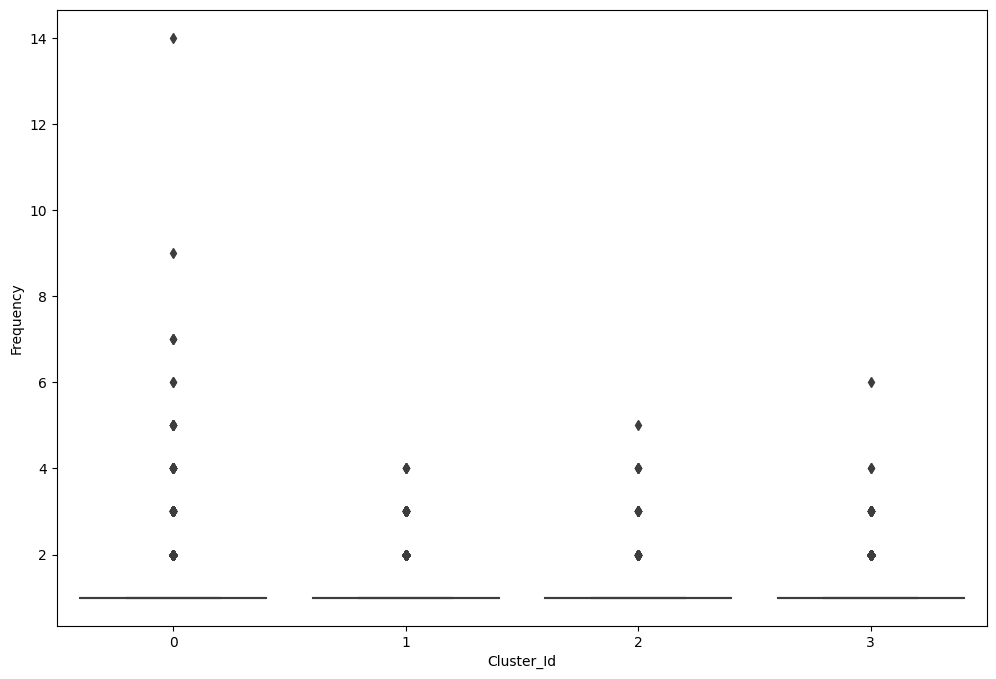

In [71]:
sns.boxplot(x = 'Cluster_Id', y = 'Frequency', data = rfm)

<AxesSubplot: xlabel='Cluster_Id', ylabel='Monetary'>

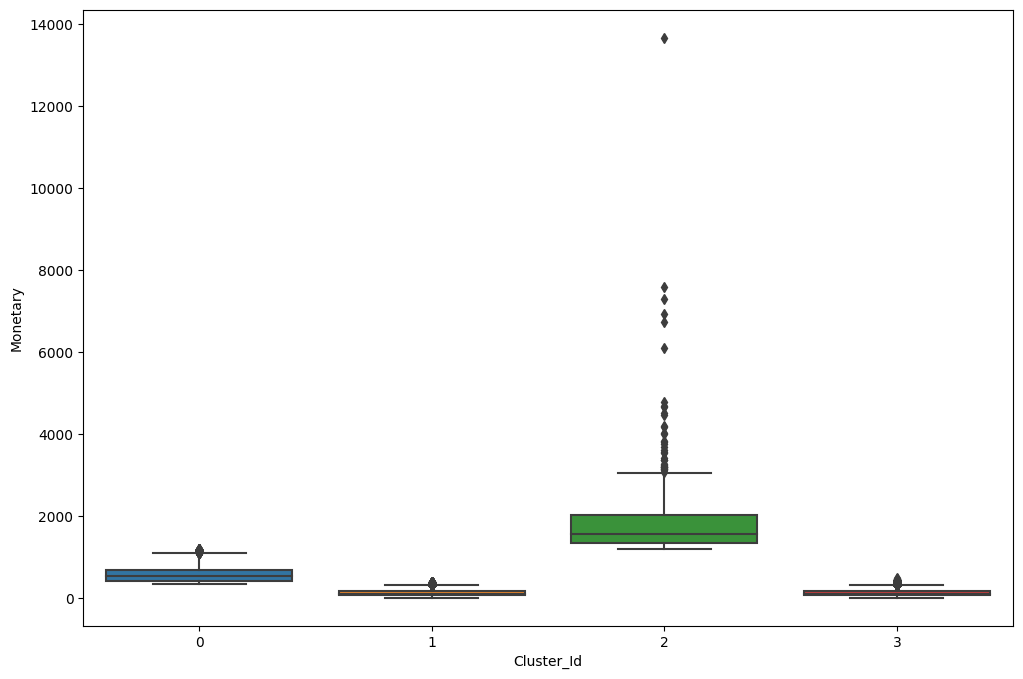

In [72]:
sns.boxplot(x= 'Cluster_Id', y = 'Monetary', data = rfm)

In [73]:
rfm2.to_csv('RFM.csv',index=False)

In [74]:
rfm2

,customer_unique_id,Recency,Frequency,Monetary,Cluster_Id,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,valuable
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,valuable
2,0000f46a3911fa3c0805444483337064,537,1,86.22,2,valuable
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,valuable
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,valuable
...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,3,passive
91461,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,3,passive
91462,ffff371b4d645b6ecea244b27531430a,568,1,112.46,1,occasion
91463,ffff5962728ec6157033ef9805bacc48,119,1,133.69,1,occasion
